In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('tagsets')
nltk.download('vader_lexicon')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/marco/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/marco/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/marco/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package tagsets to /home/marco/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/marco/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Get the data + EDA with nltk

In [2]:
from llm.config import DATA_DIR, IMAGES_DIR
filepath = DATA_DIR.joinpath('amazon_reviews.csv')

df = pd.read_csv(filepath, nrows=100)
print(df.shape)

(100, 11)


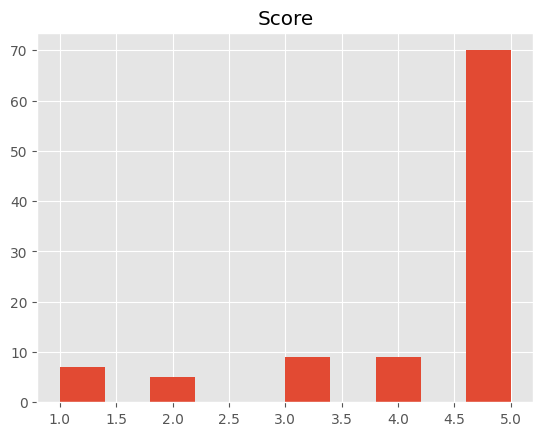

In [3]:
df[['Score']].hist()
plt.savefig(IMAGES_DIR.joinpath('score.jpeg'))

In [4]:
min_len = 100
for i, row in df.iterrows():

    new_len = len(row['Text'].split())
    if new_len < min_len:
        min_len = new_len

        print(i, new_len)
example = df['Text'][43]
example

0 48
2 21
10 17
15 16
43 14


'Great mustard! Place in a ramekin next to cheeses and meats.  Works with anything!'

In [24]:
# Tokenize the text

tokens = nltk.word_tokenize(example)
tokens[:10]

['Great',
 'mustard',
 '!',
 'Place',
 'in',
 'a',
 'ramekin',
 'next',
 'to',
 'cheeses']

In [25]:
# Part of Speech tagger

tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Great', 'NNP'),
 ('mustard', 'NN'),
 ('!', '.'),
 ('Place', 'NN'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('ramekin', 'JJ'),
 ('next', 'JJ'),
 ('to', 'TO'),
 ('cheeses', 'NNS')]

In [26]:
## Complete list of tags
# nltk.help.upenn_tagset()

In [27]:
# Groups tokens into chunk of text
entities = nltk.chunk.ne_chunk(tagged)
out = IMAGES_DIR.joinpath('score')


In [28]:
from nltk import Tree
from graphviz import Digraph

def add_edges(tree, dot=None, parent=None):
    """
    Recursively traverse the NLTK tree, adding nodes and edges to the Graphviz Digraph.
    Args:
        tree (nltk.Tree): The tree to convert.
        dot (graphviz.Digraph): The Graphviz Digraph for rendering the tree.
        parent (str): The node ID of the parent to this subtree.
    Returns:
        graphviz.Digraph: The updated Graphviz Digraph with nodes and edges added.
    """
    if dot is None:
        dot = Digraph(comment='NLTK Tree')

    node_id = str(id(tree))  # Use Python's id function to get a unique identifier

    # Determine the label based on whether it's a leaf node
    if isinstance(tree[0], tuple):  # Check if the first child is a tuple (indicating leaf nodes)
        label = '{}: {}'.format(tree.label(), ' '.join(['{}/{}'.format(word, tag) for word, tag in tree]))
    else:
        label = tree.label()

    dot.node(node_id, label=label)

    # Create edges from the parent node to this node
    if parent:
        dot.edge(parent, node_id)

    # Recursively add child nodes
    for child in tree:
        if isinstance(child, Tree):
            add_edges(child, dot, node_id)

    return dot

# Generate DOT format and render it
dot = add_edges(entities)
dot.format = 'png'
dot.render(out)  # This saves the output as 'entities_tree_output.png'


'/home/marco/Desktop/ATOM/LLM/llm/images/score.png'

In [16]:
entities.label()

'S'

In [14]:
entities.leaves()

[('Great', 'NNP'),
 ('mustard', 'NN'),
 ('!', '.'),
 ('Place', 'NN'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('ramekin', 'JJ'),
 ('next', 'JJ'),
 ('to', 'TO'),
 ('cheeses', 'NNS'),
 ('and', 'CC'),
 ('meats', 'NNS'),
 ('.', '.'),
 ('Works', 'VBZ'),
 ('with', 'IN'),
 ('anything', 'NN'),
 ('!', '.')]

In [ ]:
# Need Tkinter
entities.draw()

In [ ]:
from nltk.draw.util import CanvasFrame
from nltk.draw import TreeWidget

# Create a canvas frame
cf = CanvasFrame()
tc = TreeWidget(cf.canvas(), entities)
cf.add_widget(tc, 10, 10)  # (10,10) offsets
cf.print_to_file(IMAGES_DIR.joinpath('entities.ps'))  # Save as PostScript file
cf.destroy()

## Convert PostScript to PNG using Ghostscript or another tool
#import os
#os.system("gs -sDEVICE=pngalpha -sOutputFile=tree.png -r144 -dBATCH -dNOPAUSE tree.ps")


In [ ]:
nltk.help.upenn_tagset('DT')

# VADER sentiment scoring

VADER (Valence Aware Dictionary and sEntiment Reasoner ) is a lexicon and rule-based sentiment analysis tool designed specifically for social media and other online texts. It evaluates the sentiment of words and phrases within context, applying grammatical rules and a sentiment lexicon.

**Pros**
- High Sensitivity to Context: Effectively interprets context like capitalization, intensifiers, and emoticons.
- Specific to Social Media: Optimized for the nuances of social media text, including slang and unconventional language.
- Fast and Efficient: Suitable for real-time processing due to its straightforward computational model.

**Cons**
- Limited to Lexicon: Relies on a predefined list of words, which may miss sentiments expressed through novel slang or expressions.
- Less Effective Outside Social Media: May not perform as well with formal texts or content significantly different from typical social media discourse.
- Language Dependency: Primarily developed for English, with its effectiveness reduced in other languages.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

# Examples of polarity scores

In [ ]:
# Very positive

sia.polarity_scores('I am the happiest person ever')

In [ ]:
# Very negative 

sia.polarity_scores('This is the worst day of my life')

In [ ]:
# polarity of example comment 

sia.polarity_scores(example)

In [ ]:
# Run the polarity score on the entire dataset

results = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    results[myid] = sia.polarity_scores(text)

In [ ]:
# Reshape results dict into pandas DF and merge with data DF

vaders = pd.DataFrame(results).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

### Plot VADER results

In [ ]:
# Plot the compound score

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)

for (count, score) in enumerate(['neg', 'neu', 'pos', 'compound']):
    cc, rr = count //2, count % 2
    sns.barplot(data=vaders, x='Score', y=score, ax=ax[cc,rr])
    ax[cc, rr].set_title(f'Score:"{score}"')

plt.savefig(IMAGES_DIR.joinpath('vader_scores.jpeg'))

# Roberta Pretrained Model

**BERT** (Bidirectional Encoder Representations from Transformers) is a model developed by Google, using the Transformer architecture, particularly the attention mechanism, to process words in relation to all other words in a sentence, rather than one-by-one sequentially. 

**RoBERTa** (Robustly Optimized BERT Approach) builds upon BERT with several key improvements and optimizations that boost performance on a wide array of natural language processing tasks.

I will use a pretrained model (cardiffnlp/twitter-roberta-base-sentiment)


In [ ]:
from llm.core.amazon import polarity_scores_roberta
from llm.core.amazon import polarity_scores_vader

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
# roberta_results 
polarity_scores_roberta(example, tokenizer, model)

In [ ]:
# vader_results 
polarity_scores_vader(example)

In [ ]:
# Calculate both results for the whole dataframe 

results = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_results = polarity_scores_vader(text)
        roberta_result = polarity_scores_roberta(text, tokenizer, model)
        results[myid] = {**vader_results, **roberta_result}
    except:
        print(i, myid, 'excluding since too big')

In [ ]:
results_df = pd.DataFrame(results).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [ ]:
sns.pairplot(
    data=results_df,
    vars=['vader_neg', 'vader_neu', 'vader_pos',
          'roberta_neg', 'roberta_neu', 'roberta_pos'],
    hue='Score',
    palette='tab10', 
    ).savefig(IMAGES_DIR.joinpath('vader_vs_roberta.jpeg'))

# Review Predictions

Let's have a look at false positive and false negatives for the two models:
- False positives: negative reviews that are predicted to be positive
- False negatives: positive reviews that are predicted as negative

In [ ]:
# False positive Roberta
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

In [ ]:
# False positive VADER
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

In [ ]:
# False negative Roberta
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

In [ ]:
# False negative VADER
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

In [ ]:
results_df.columns

# Correlation Matrix

Another way to represent the accuracy of our model is to calcuate the correlation matrix and print it as a heat map.

In [ ]:
corr_matrix = results_df[[
    'Score',
    'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
    'roberta_neg', 'roberta_neu', 'roberta_pos'
]].corr()

# Draw the heatmap
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    cbar_kws={'label': 'Correlation coefficient'})

# Add titles and labels
plt.title('Correlation Matrix')
plt.savefig(IMAGES_DIR.joinpath('correlation_matrix.jpeg'))

# Confusion Matrix

A confusion matrix can tell us how many scores are predicted correctly. To do so, we first need to map the results from our models into integers. 

In [ ]:
from llm.core.amazon import map_scores

results_df['roberta_int'] = results_df.apply(lambda row: map_scores(row, 'roberta'), axis=1)
results_df['vader_int'] = results_df.apply(lambda row: map_scores(row, 'vader'), axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(results_df['Score'], results_df['roberta_int'])
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')

# Add titles and labels
plt.title('Confusion Matrix')
plt.savefig(IMAGES_DIR.joinpath('confusion_matrix.jpeg'))

# Transformers Pipeline

Quick & easy way to run sentiment predictions

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

In [ ]:
sent_pipeline(example)